In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import regression_utils as ru

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [62]:
dataframe = pd.read_csv("./Data/train.csv")
dataframe = dataframe[['LotFrontage','LotArea', 'SalePrice']]

In [63]:
def normalize_data(dataframe: pd.DataFrame):
    """
    Take all the columns except for the last one as X and scale data by log2
    """
    np_df = dataframe.dropna().to_numpy()
    x, y = np_df[:, :-1], np_df[:, -1]

    return ru.reject_outliers(np.log2(x), np.log2(y), 65, 35, 1.5)

In [64]:
def fit(x, y, learning_rate=0.00001, epsilon=0.9):
    """
    Fit linear regression, using gradient descent
    """

    regression = np.c_[x, np.ones(len(x))]
    weights = np.ones(regression.shape[1])

    losses = []
    epochs = 0
    norma = 1
    while norma > epsilon:
        epochs += 1
        y_predictions = regression @ weights.T
        partial = regression.T @ (y - y_predictions)

        norma = np.sum(np.sqrt(np.square(partial)))
        losses.append(norma)

        weights = weights.T + (learning_rate * partial)

        if np.isnan(norma):
            raise ValueError('The model diverged. Try using smaller learning rate.')

    return weights, losses

In [65]:
def predict(weights, x):
    """
    Predict Y values by applying m * x + b
    """
    return weights[:-1] @ np.array(x).T + weights[-1]

In [66]:
def get_sklearn_predictions(x, y):
    return LinearRegression().fit(x, y).predict(x)

In [67]:
normalized_feature_values, normalized_expected_predictions = normalize_data(dataframe)
weights, losses = fit(normalized_feature_values, normalized_expected_predictions)
predicted_values = predict(weights, normalized_feature_values)
sklearn_predictions = get_sklearn_predictions(normalized_feature_values, normalized_expected_predictions)

In [77]:
final_data = pd.DataFrame({
    'Lot Frontage': normalized_feature_values[:, :1].reshape(len(normalized_feature_values)).tolist(),
    'Lot Area': normalized_feature_values[:, 1:].reshape(len(normalized_feature_values)).tolist(),
    'Sale Price': normalized_expected_predictions.tolist(),
    'Predicted Sale Price (My)': predicted_values.tolist(),
    'Predicted Sale Price (SK)': sklearn_predictions.tolist(),
    'MES (My)': ((normalized_expected_predictions - predicted_values) ** 2).tolist(),
    'MES (SK)': ((normalized_expected_predictions - sklearn_predictions) ** 2).tolist()
})

final_data

,Lot Frontage,Lot Area,Sale Price,Predicted Sale Price (My),Predicted Sale Price (SK),MES (My),MES (SK)
0,6.022368,13.044736,17.669688,17.141659,17.179122,0.278814,0.240655
1,6.321928,13.228819,17.469610,17.484478,17.481091,0.000221,0.000132
2,6.087463,13.457637,17.769915,17.474284,17.420567,0.087398,0.122044
3,5.906891,13.221285,17.095067,17.180839,17.179421,0.007357,0.007115
4,6.228819,13.299780,18.227879,17.466651,17.447670,0.579468,0.608726
...,...,...,...,...,...,...,...
811,5.954196,12.950738,17.416995,17.027575,17.085834,0.151649,0.109668
812,6.409391,13.685515,17.680030,17.863502,17.759253,0.033662,0.006276
813,6.044394,13.142426,18.023776,17.225120,17.241005,0.637851,0.612730
814,6.087463,13.246295,17.116801,17.327988,17.320917,0.044600,0.041663


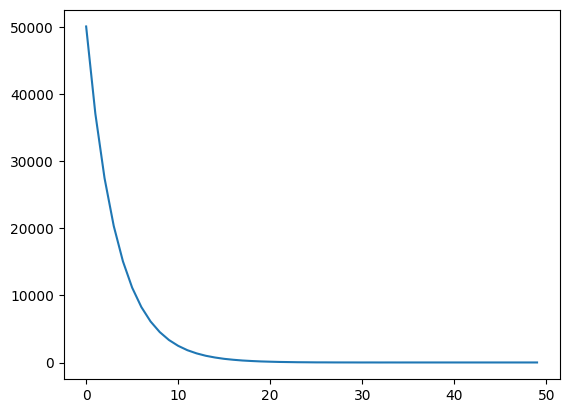

In [69]:
plt.plot(np.arange(len(losses))[:50], losses[:50])